# AdaGrad Optimizer with Keras 

AdaGrad가 각각의 weights $ \theta_i $ 별로 learning rate값을 다르게 줌으로서, sparse data에 적합하다고 하는데.. 정말로 그런지 실험해보는 문서

In [46]:
%pylab inline
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
from keras.optimizers import Adagrad
from keras.utils import np_utils


from IPython.display import SVG, Image
from keras.utils.visualize_util import model_to_dot

Populating the interactive namespace from numpy and matplotlib


# Data 

In [109]:
data = pd.read_csv('/dataset/credit-card-fraud-detection/creditcard.csv')

# Shrink normal data to overcome Adagrad Error
# data = pd.concat([data[data['Class'] == 0][:5000], data[data['Class'] == 1]])
# data = data.sample(frac=1)

# Preprocessing Amount
amt_scale = StandardScaler()
data['NormAmount'] =  amt_scale.fit_transform(data['Amount'].values.reshape(-1, 1))

# Split Train and Test Data
X = data.drop(['Time', 'Amount', 'Class'], axis=1).as_matrix()
Y = data['Class'].as_matrix()
Y = Y.reshape((Y.shape[0], 1))

# Standardization
scale_x = StandardScaler()
X = scale_x.fit_transform(X)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=1)

fraud_test_y = test_y == 1
fraud_test_y = fraud_test_y.reshape(fraud_test_y.shape[0])
fraud_test_x = test_x[fraud_test_y]
fraud_test_y = test_y[fraud_test_y]


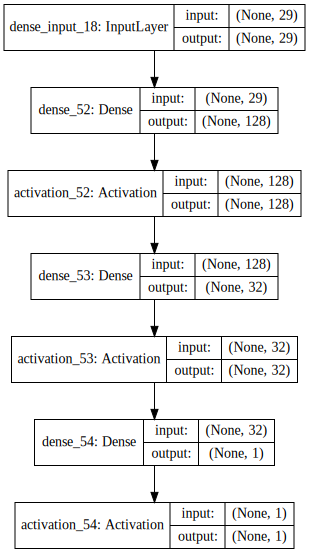

In [112]:
model = Sequential()

model.add(Dense(output_dim=128, input_dim=29))
model.add(Activation('relu'))
model.add(Dense(output_dim=32, input_dim=128))
model.add(Activation('relu'))
model.add(Dense(output_dim=1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', 
              optimizer=Adagrad(lr=0.1), 
              metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [113]:
model.fit(train_x, train_y, verbose=2)

Epoch 1/10
25s - loss: 15.9139 - acc: 0.0018
Epoch 2/10
25s - loss: 15.9139 - acc: 0.0018
Epoch 3/10
25s - loss: 15.9139 - acc: 0.0018
Epoch 4/10
25s - loss: 15.9139 - acc: 0.0018
Epoch 5/10
25s - loss: 15.9139 - acc: 0.0018
Epoch 6/10
25s - loss: 15.9139 - acc: 0.0018
Epoch 7/10
25s - loss: 15.9139 - acc: 0.0018
Epoch 8/10
24s - loss: 15.9139 - acc: 0.0018
Epoch 9/10
25s - loss: 15.9139 - acc: 0.0018
Epoch 10/10
25s - loss: 15.9139 - acc: 0.0018


In [115]:
loss, accuracy = model.evaluate(test_x, test_y, verbose=2)
print('loss:%f, \taccuracy:%f' % (loss, accuracy))

loss, accuracy = model.evaluate(fraud_test_x, fraud_test_y, verbose=2)
print('loss:%f, \taccuracy:%f' % (loss, accuracy))

loss:15.917531, 	accuracy:0.001559
loss:0.000000, 	accuracy:1.000000
